# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [8]:
# script params
EXEC: bool = False

In [9]:
# create /bin if it does not exist
!mkdir -p bin

print("Compilation process:")
print("    + critical")
!g++ -o bin/tp_openmp_part_1_pi_critical tp_openmp_part_1_pi_critical.cpp -fopenmp -O3 -march=native

print("    + atomic")
!g++ -o bin/tp_openmp_part_1_pi_atomic tp_openmp_part_1_pi_atomic.cpp -fopenmp -O3 -march=native

print("    + reduction")
!g++ -o bin/tp_openmp_part_1_pi_reduction tp_openmp_part_1_pi_reduction.cpp -fopenmp -O3 -march=native

print("    + nred")
!g++ -o bin/tp_openmp_part_1_pi_nred tp_openmp_part_1_pi_nred.cpp -fopenmp -O3 -march=native -Wall

Compilation process:
    + critical
    + atomic
    + reduction
    + nred


### Performance evaluation

In [20]:
# global vars
csv_result_file = "stats.csv"
csv_headers = {
    'version': str,
    'nb_threads': int,
    'num_steps' : int,
    'runtime' : float
}
color_num_steps = {
    100000 : "blue", 
    1000000 : "red", 
    10000000 : "orange",
    100000000 : "green",
    1000000000 : "black"}
#num_steps = list(color_num_steps.keys())[0:2]
num_steps = list(color_num_steps.keys())
print(num_steps)
nb_threads = [1, 2, 4, 8]
repeats = range(0,10)

[100000, 1000000, 10000000, 100000000, 1000000000]


In [21]:
import os
import subprocess

def delete_old_csv_file():
    try:
        os.remove(csv_result_file)
    except OSError:
        pass

def create_csv_file():
    print(f"Creating NEW CSV file ({csv_result_file})")
    f = open(csv_result_file, "w")
    f.write(",".join(csv_headers.keys()) + "\n")
    f.close()

# exec
def exec_instances():
    for nsteps in num_steps:
        for nb_thread in nb_threads:
            for repeat in repeats:
                args = ("./bin/tp_openmp_part_1_pi_critical", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()
                
                args = ("./bin/tp_openmp_part_1_pi_atomic", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./bin/tp_openmp_part_1_pi_reduction", "-T", str(nb_thread), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()


if EXEC:
    delete_old_csv_file()
    create_csv_file()
    exec_instances()
else: 
    print(f"EXEC = {EXEC}. No C++ program execution.")

EXEC = False. No C++ program execution.


### Performance analysis
#### Weak scaling

,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001823
1,atomic,1,100000,0.000622
2,reduction,1,100000,0.000126
3,critical,1,100000,0.000981
4,atomic,1,100000,0.000479
5,reduction,1,100000,0.000131
6,critical,1,100000,0.000978
7,atomic,1,100000,0.000482
8,reduction,1,100000,0.000125
9,critical,1,100000,0.000979


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


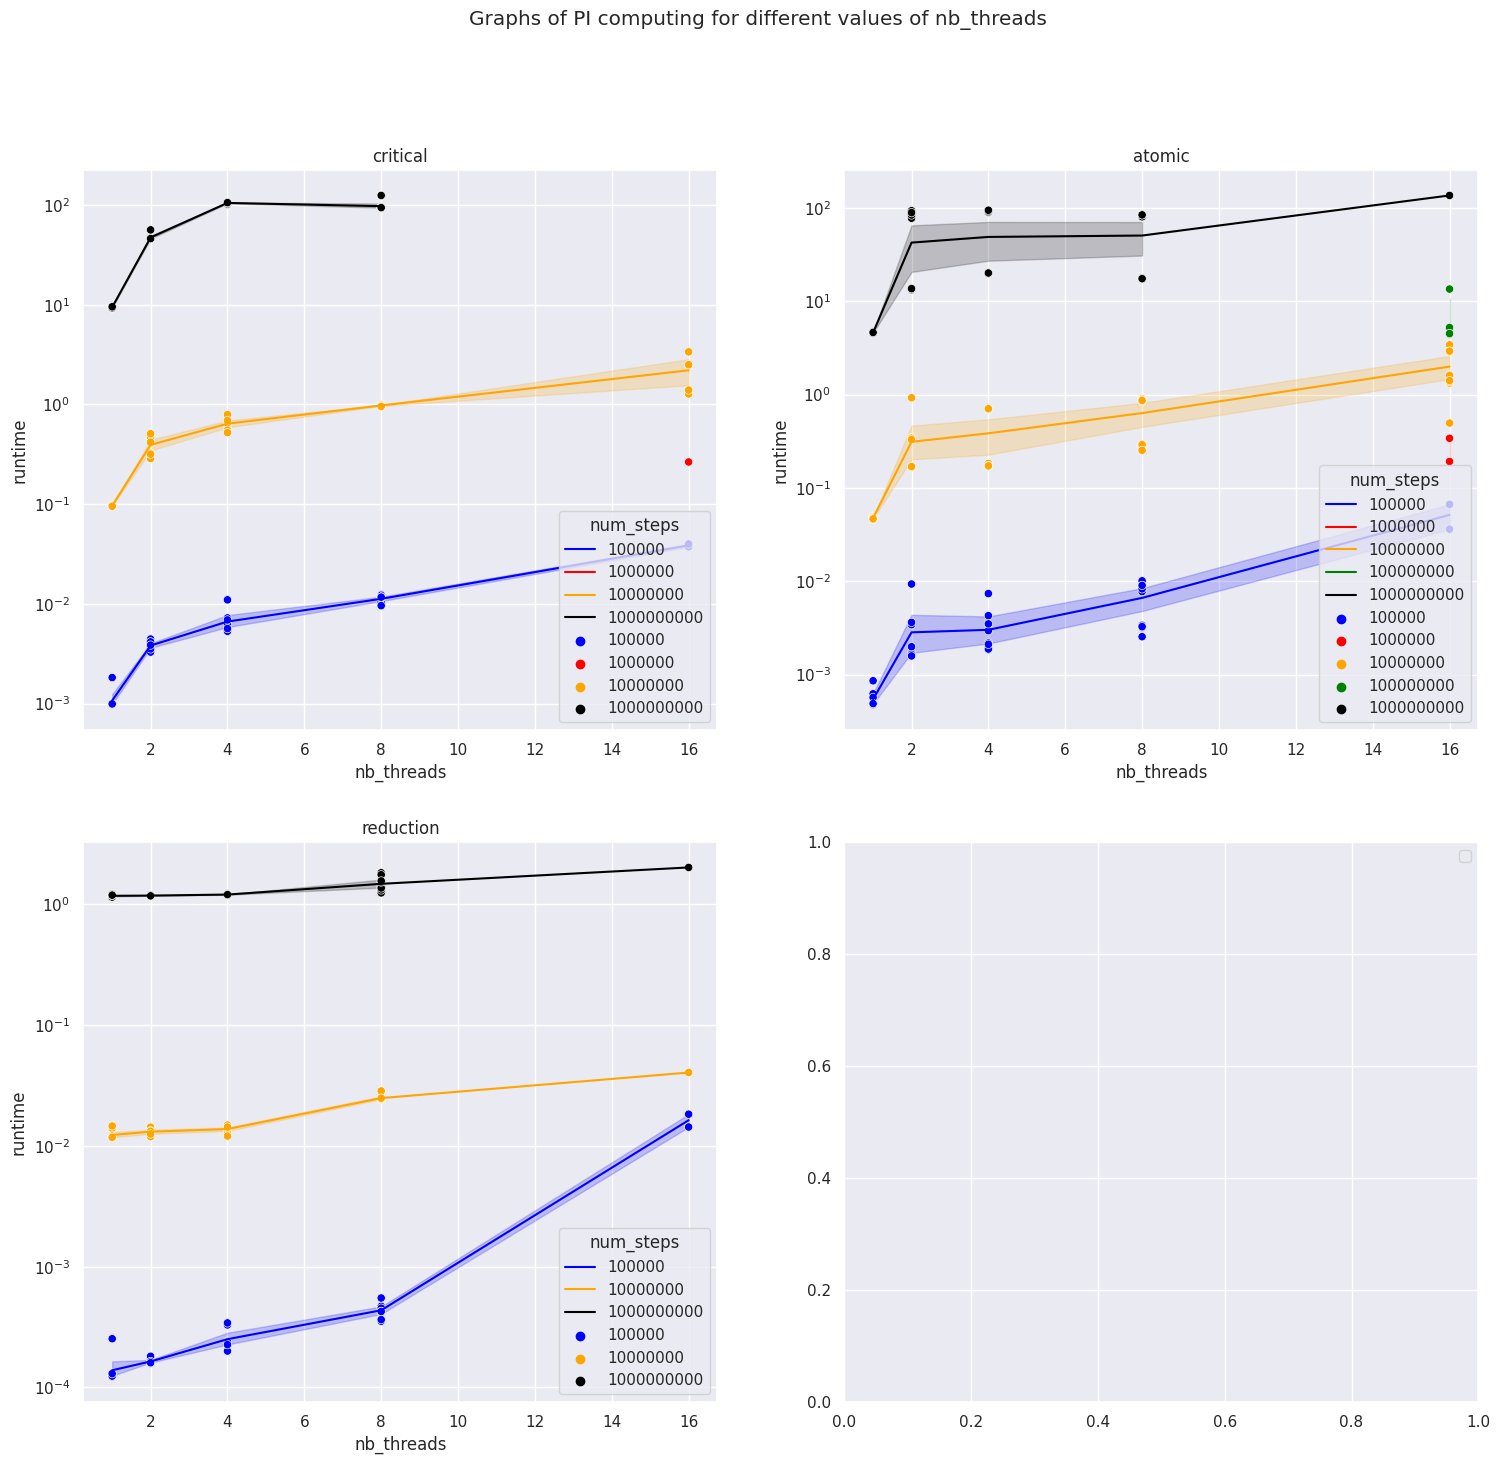

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# display graphs
fig, ax = plt.subplots(2, 2, figsize=(18,16))
fig.suptitle("Graphs of PI computing for different values of nb_threads")

unique_nb_steps = df['num_steps'].unique()
unique_nb_steps.sort()
nb_different_num_steps = len(unique_nb_steps)
# for i in range(nb_different_num_steps):
#     current_num_steps = int(unique_nb_steps[i])
#     df_plot = df[(df['num_steps'] == current_num_steps)]
#     mean_stats = df.groupby(['num_steps','version','nb_threads']).mean().reset_index()

#     # first graph: critical
#     graph_version = "critical"
#     df_plot_0 = df_plot[df_plot['version'] == "critical"]

#     axes[0][0].plot(
#         mean_stats['nb_threads'], 
#         mean_stats['runtime'],
#         linestyle="solid",
#         color=color_num_steps[current_num_steps],
#         marker='x',
#     )
#     axes[0][0].set(
#         yscale="log",
#         xlabel="nb_threads",
#         ylabel="time (s)",
#         title=graph_version
#     )
#     axes[0][0].scatter(
#         df_plot_0['nb_threads'], 
#         df_plot_0['runtime'],
#         color=color_num_steps[current_num_steps]
#     )

# graph plotting using seaborn
# first graph: critical
graph_version = "critical"
df_plot_0 = df[df['version'] == graph_version]

g0 = sns.lineplot(
    ax=ax[0][0],
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g0.set(title=graph_version)
g0.set(yscale="log")
g00 = sns.scatterplot(
    ax=ax[0][0],
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g00.set(yscale="log")

# second graph: atomic
graph_version = "atomic"
df_plot_1 = df[df['version'] == graph_version]

g1 = sns.lineplot(
    ax=ax[0][1],
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g1.set(title=graph_version)
g1.set(yscale="log")
g11 = sns.scatterplot(
    ax=ax[0][1],
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g11.set(yscale="log")

# third graph: reduction
graph_version = "reduction"
df_plot_2 = df[df['version'] == graph_version]

g2 = sns.lineplot(
    ax=ax[1][0],
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g2.set(title=graph_version)
g2.set(yscale="log")
g22 = sns.scatterplot(
    ax=ax[1][0],
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g22.set(yscale="log")


plt.legend()
plt.show()

,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001823
1,atomic,1,100000,0.000622
2,reduction,1,100000,0.000126
3,critical,1,100000,0.000981
4,atomic,1,100000,0.000479
5,reduction,1,100000,0.000131
6,critical,1,100000,0.000978
7,atomic,1,100000,0.000482
8,reduction,1,100000,0.000125
9,critical,1,100000,0.000979


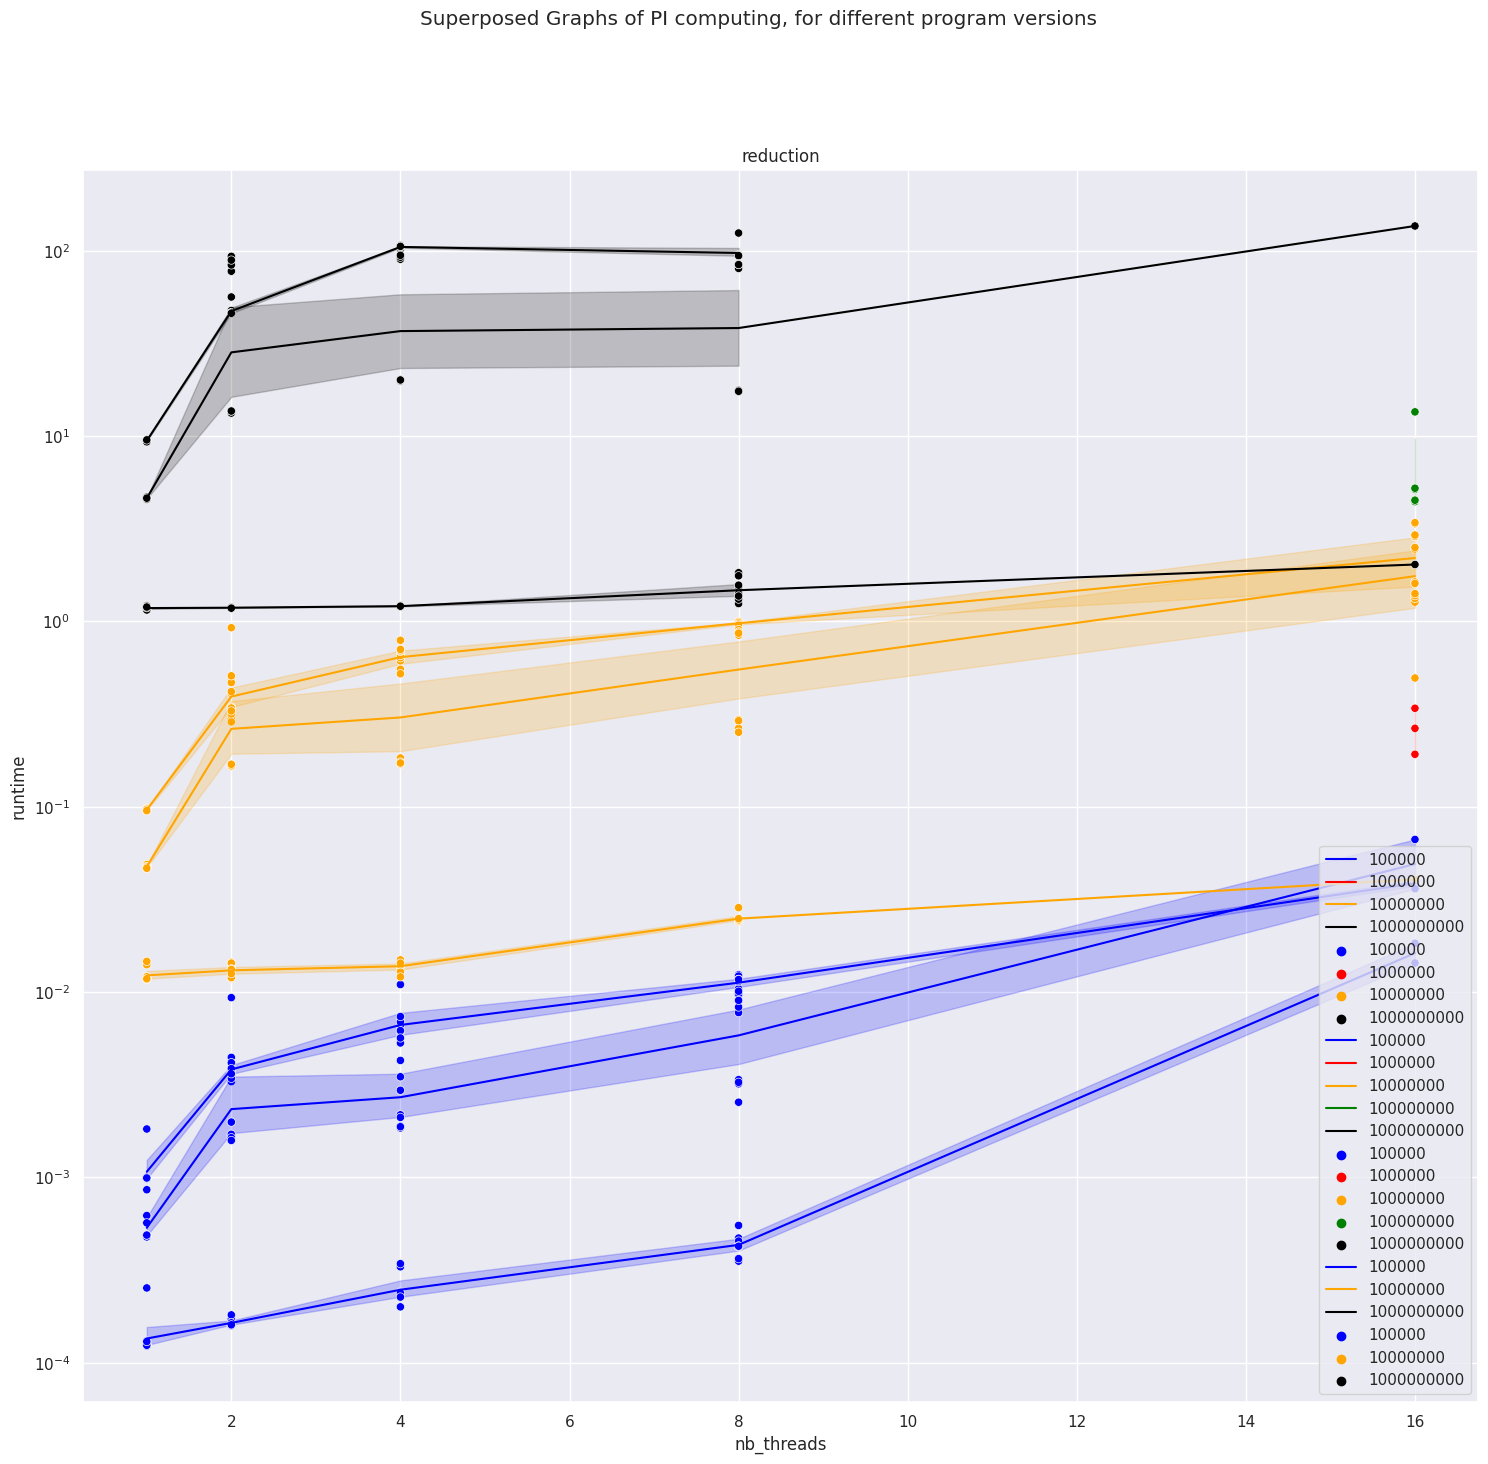

In [24]:
# superposed big graph
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# display graphs
fig, ax = plt.subplots(figsize=(18,16))
fig.suptitle("Superposed Graphs of PI computing, for different program versions")

unique_nb_steps = df['num_steps'].unique()
unique_nb_steps.sort()
nb_different_num_steps = len(unique_nb_steps)
# for i in range(nb_different_num_steps):
#     current_num_steps = int(unique_nb_steps[i])
#     df_plot = df[(df['num_steps'] == current_num_steps)]
#     mean_stats = df.groupby(['num_steps','version','nb_threads']).mean().reset_index()

#     # first graph: critical
#     graph_version = "critical"
#     df_plot_0 = df_plot[df_plot['version'] == "critical"]

#     axes[0][0].plot(
#         mean_stats['nb_threads'], 
#         mean_stats['runtime'],
#         linestyle="solid",
#         color=color_num_steps[current_num_steps],
#         marker='x',
#     )
#     axes[0][0].set(
#         yscale="log",
#         xlabel="nb_threads",
#         ylabel="time (s)",
#         title=graph_version
#     )
#     axes[0][0].scatter(
#         df_plot_0['nb_threads'], 
#         df_plot_0['runtime'],
#         color=color_num_steps[current_num_steps]
#     )

# graph plotting using seaborn
# first graph: critical
graph_version = "critical"
df_plot_0 = df[df['version'] == graph_version]

g0 = sns.lineplot(
    ax=ax,
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g0.set(title=graph_version)
g0.set(yscale="log")
g00 = sns.scatterplot(
    ax=ax,
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g00.set(yscale="log")

# second graph: atomic
graph_version = "atomic"
df_plot_1 = df[df['version'] == graph_version]

g1 = sns.lineplot(
    ax=ax,
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g1.set(title=graph_version)
g1.set(yscale="log")
g11 = sns.scatterplot(
    ax=ax,
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g11.set(yscale="log")

# third graph: reduction
graph_version = "reduction"
df_plot_2 = df[df['version'] == graph_version]

g2 = sns.lineplot(
    ax=ax,
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g2.set(title=graph_version)
g2.set(yscale="log")
g22 = sns.scatterplot(
    ax=ax,
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
    
)
g22.set(yscale="log")


plt.legend()
plt.show()


#### Strong Scaling

### Discussion